In [97]:
import numpy as np
from numpy import trapz, sqrt
import matplotlib.pyplot as plt


In [106]:
# initialization

f0 = 1800
Vmod = 1200
Vinf = 2400

m = Vinf // Vmod
T = 1 / Vmod
N = 1024
A = 1
dt = (1 / f0) / N
q = 2**m

S = lambda si1, si2, t: si1 * np.sqrt(2 / T) * np.cos(2 * np.pi * f0 * t) + si2 * np.sqrt(2 / T) * np.sin(2 * np.pi * f0 * t)

t = np.arange(0, T, dt)

phi1 = lambda t: np.sqrt(2 / T) * np.cos(2 * np.pi * f0 * t)
phi2 = lambda t: np.sqrt(2 / T) * np.sin(2 * np.pi * f0 * t)


[0.00000000e+00 5.42534722e-07 1.08506944e-06 ... 8.31705729e-04
 8.32248264e-04 8.32790799e-04]


In [99]:
result1 = np.trapz(phi1(t) * phi1(t), t)
result2 = np.trapz(phi1(t) * phi2(t), t)
result3 = np.trapz(phi2(t) * phi1(t), t)
result4 = np.trapz(phi2(t) * phi2(t), t)

print('(phi1, phi1) =', result1)
print('(phi1, phi2) =', result2)
print('(phi2, phi1) =', result3)
print('(phi2, phi2) =', result4)


(phi1, phi1) = 0.9986979411777865
(phi1, phi2) = 3.994641369020613e-06
(phi2, phi1) = 3.994641369020613e-06
(phi2, phi2) = 0.99999997548888


In [100]:
def getSi12(i, q, A):
    i1 = math.floor(i / math.sqrt(q))
    i2 = i % int(math.sqrt(q))
    si1 = A * (1 - (2 * i1) / (math.sqrt(q) - 1))
    si2 = A * (1 - (2 * i2) / (math.sqrt(q) - 1))
    return si1, si2


0 0.9987019358191558 1.000003970130249
1 0.9986939465364175 -0.9999959808475108
2 -0.9986939465364175 0.9999959808475108
3 -0.9987019358191558 -1.000003970130249


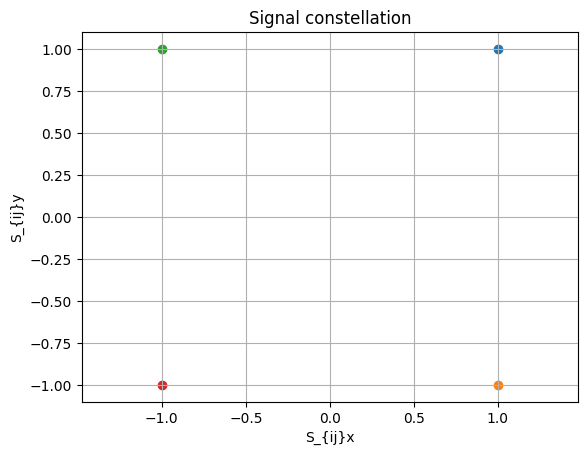

In [113]:
plt.figure()

Sijx_points = []
Sijy_points = []

for i in range(q):
    Si1, Si2 = getSi12(i, q, A)
    Si = S(Si1, Si2, t)
    x = phi1(t)
    y = phi2(t)
    Sijx = np.trapz(Si * x, t)
    Sijy = np.trapz(Si * y, t)
    
    Sijx_points.append(Sijx)
    Sijy_points.append(Sijy)

    plt.scatter(Sijx, Sijy)

plt.grid(True)
plt.xlabel('S_{ij}x')
plt.ylabel('S_{ij}y')
plt.title('Signal constellation')
plt.axis('equal')

plt.show()


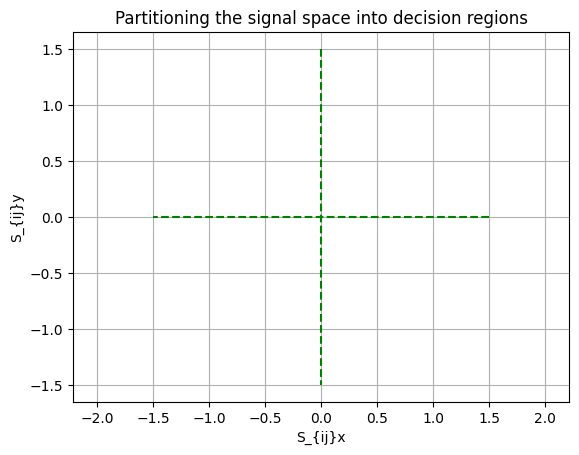

In [102]:
plt.figure()
size = int(np.sqrt(q)) + 1
dx = 2 / (size - 1)
areas = np.linspace(-1.5, 1.5, size)

for i in range(len(areas)):
    if i == 0 or i == len(areas) - 1:
        continue
    plt.plot([areas[i], areas[i]], [1.5, -1.5], color='green', linestyle='--')
    plt.plot([1.5, -1.5], [areas[i], areas[i],], color='green', linestyle='--')

plt.grid(True)
plt.xlabel('S_{ij}x')
plt.ylabel('S_{ij}y')
plt.title('Partitioning the signal space into decision regions')
plt.axis('equal')

plt.show()


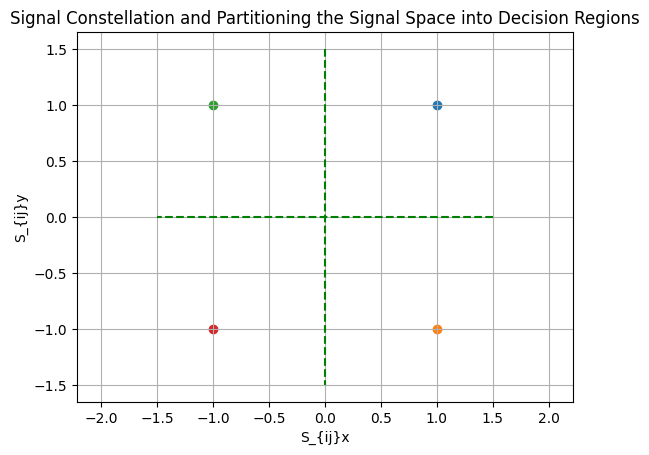

In [103]:
plt.figure()
Sijx_points = []
Sijy_points = []

for i in range(q):
    Si1, Si2 = getSi12(i, q, A)
    Si = S(Si1, Si2, t)
    x = phi1(t)
    y = phi2(t)
    Sijx = np.trapz(Si * x, t)
    Sijy = np.trapz(Si * y, t)

    Sijx_points.append(Sijx)
    Sijy_points.append(Sijy)

    plt.scatter(Sijx, Sijy)

size = int(np.sqrt(q)) + 1
dx = 2 / (size - 1)
areas = np.linspace(-1.5, 1.5, size)

for i in range(len(areas)):
    if i == 0 or i == len(areas) - 1:
        continue
    plt.plot([areas[i], areas[i]], [1.5, -1.5], color='green', linestyle='--')
    plt.plot([1.5, -1.5], [areas[i], areas[i],], color='green', linestyle='--')

plt.grid(True)
plt.xlabel('S_{ij}x')
plt.ylabel('S_{ij}y')
plt.title('Signal Constellation and Partitioning the Signal Space into Decision Regions')
plt.axis('equal')

plt.show()
